In [5]:
import qiskit
import numpy as np
import time
from problem import qft
import os, utilities
%load_ext autoreload
%autoreload

types = ['FP32', 'FP16', 'FX32', 'FX24', 'FX16']
num_qubits = 17
for datatype in types:
    print(datatype)
    fidelities = []
    for num_qubits in range(3, num_qubits + 1):
        # from software simulator
        state = qft.qft_Qsun_verify(num_qubits) # return amplitudes
        # from FPGA emulator
        state_qft = utilities.read_complex_numbers(f'./data/qft/FPGA_{datatype}/QFT_{datatype}_Output_{num_qubits}_qubit.txt')
        fidelities.append(utilities.fidelity(state, state_qft))
        np.savetxt(f'./fidelity/qft/qft_{datatype}_Fidelity.txt', fidelities)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
FP32
FP16
FX32
FX24
FX16


In [10]:
import qiskit
import numpy as np
import time
from problem import qft
import os, utilities
from qoop.core import metric

types = ['FP32', 'FP16', 'FX32', 'FX24', 'FX16']
num_qubits = 17
for datatype in types:
    print(datatype)
    mses = []
    for num_qubits in range(3, num_qubits + 1):
        # from software simulator
        state = qft.qft_Qsun_verify(num_qubits) # return amplitudes
        # from FPGA emulator
        state_qft = utilities.read_complex_numbers(f'./data/qft/FPGA_{datatype}/QFT_{datatype}_Output_{num_qubits}_qubit.txt')
        mses.append(np.sum(np.abs(state - state_qft)**2)/len(state))
        np.savetxt(f'./mse/qft_{datatype}_MSE.txt', mses)

FP32
FP16
FX32
FX24
FX16


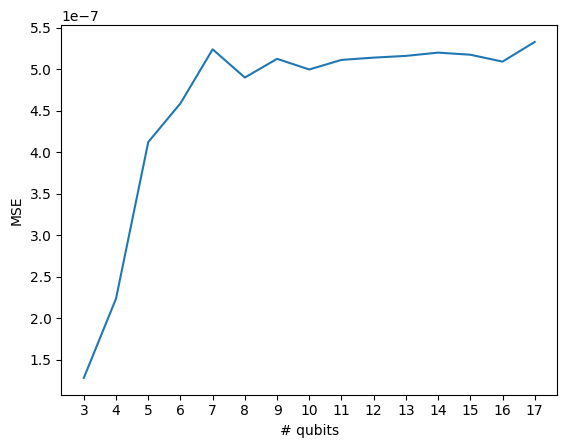